### Cloning [**simplif-ai**](https://github.com/namanshrimali/simplif-ai.git)
A library which have all the boilerplate codes available as a module, a one stop solution to jump start deep learning 

In [ ]:
!git clone https://github.com/namanshrimali/simplif-ai.git
!pip install -U albumentations
!pip install requests
%cd simplif-ai

%matplotlib inline 
# This turns on inline plotting, where plot graphics will appear in notebook.

Cloning into 'simplif-ai'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (228/228), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 228 (delta 99), reused 168 (delta 49), pack-reused 0
Receiving objects: 100% (228/228), 48.44 KiB | 9.69 MiB/s, done.
Resolving deltas: 100% (99/99), done.
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 37.6MB 84kB/s 
     |████████████████████████████████| 952kB 51.3MB/s 
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
/content/simplif-ai


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [ ]:
from util.devices import find_device
from data_action.data_loader import *
from util.seed import seed_everything
from data_action.custom_data_loader import CustomDataLoader


seed_everything()
DEVICE = find_device()
BATCH_SIZE = 512
DATASET = 'TINY-IMAGENET'

dataloader = CustomDataLoader(DATASET, DEVICE, BATCH_SIZE, test_split= 0.3)

trainloader = dataloader.load_training_data('mmda')
testloader = dataloader.load_testing_data()
classes = dataloader.class_list

device: cuda

Dataset downloaded successfully
Extracting ../data/tiny-imagenet-200.zip to ../data
Starting to load data
Data loaded successfully
Loading training data. Dataset: TINY-IMAGENET
Training data loaded

Loading testing data.
Test data loaded



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

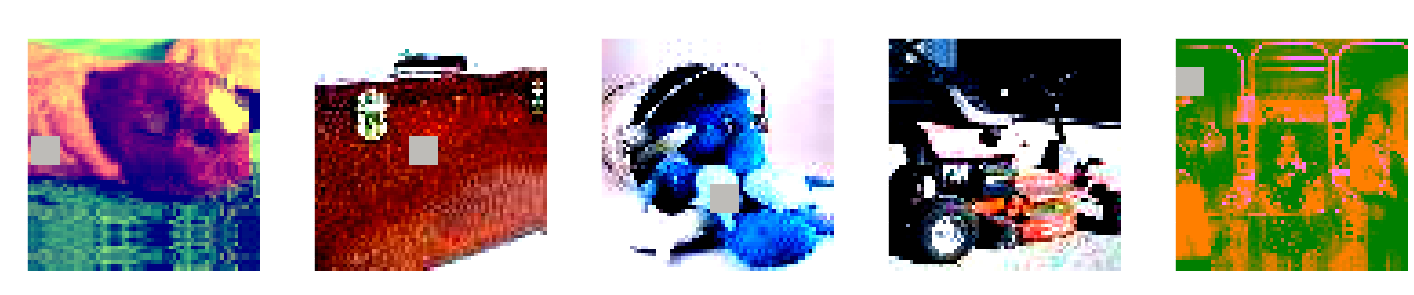

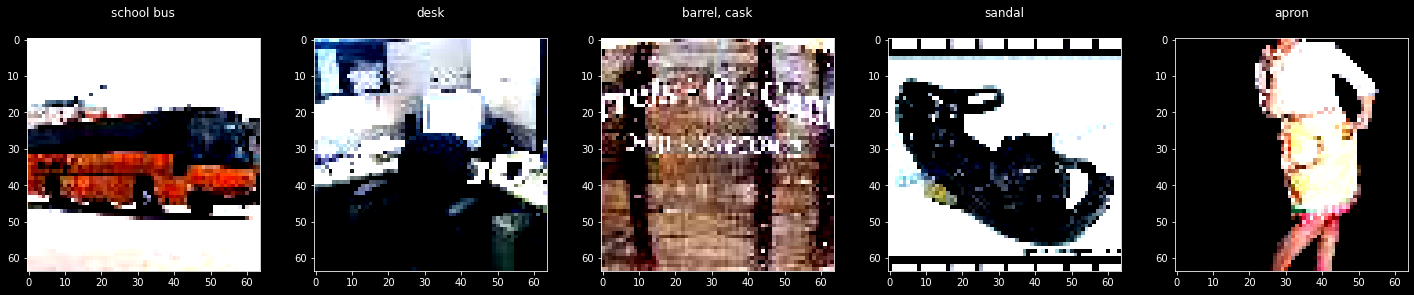

In [ ]:
from util.image_plot import plot_images

# get some random training images
dataiter = iter(trainloader)

images, labels = dataiter.next()

# show images and their labels
plot_images(dataiter, classes, total=5)

# get some random testing images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images and their labels
plot_images(dataiter, classes, total=5)

In [ ]:
from model.resnet import ResNet18
model = ResNet18(dropout=0.0, num_classes=200).to(DEVICE) # configuring 0% dropout in the resnet-18

In [ ]:
!pip install torchsummary
from torchsummary import summary

summary(model, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
           Dropout-5           [-1, 64, 64, 64]               0
            Conv2d-6           [-1, 64, 64, 64]          36,864
       BatchNorm2d-7           [-1, 64, 64, 64]             128
           Dropout-8           [-1, 64, 64, 64]               0
        BasicBlock-9           [-1, 64, 64, 64]               0
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
          Dropout-12           [-1, 64, 64, 64]               0
           Conv2d-13           [-1, 64, 64, 64]          36,864
      BatchNorm2d-14           [-1, 64,

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn


optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.22E-01


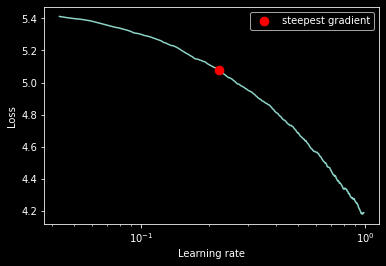

In [ ]:
from analytics.lr_finder.finder_util import find_me_ideal_lr

ideal_lr = find_me_ideal_lr(model, optimizer, criterion, trainloader, DEVICE, plot_graph = True, num_iter = 300, step_mode = "linear")

In [ ]:
EPOCHS = 50
MAX_AT_EPOCH = 10
scheduler = optim.lr_scheduler.OneCycleLR(optimizer= optimizer, epochs=EPOCHS, steps_per_epoch = len(trainloader),pct_start=MAX_AT_EPOCH/EPOCHS, max_lr = ideal_lr, div_factor= 8., final_div_factor=1, verbose=False)

In [ ]:
from learning.train import train
from learning.validate import test

train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []
learning_rates = []

for epoch in range(EPOCHS):  # loop over the dataset multiple times
    misclassified = []
    print(f'Epoch: {epoch+1}')
    train(model, DEVICE, trainloader, train_loss, train_accuracy, optimizer, learning_rates, scheduler)
    val_loss = test(model, DEVICE, testloader, test_loss, test_accuracy, misclassified)

  0%|          | 0/137 [00:00<?, ?it/s]

Epoch: 1


loss=4.419986724853516 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 2466/70000 (3.5229%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 4.7625, Accuracy: 1592/30000 (5.31%)

Epoch: 2


loss=4.120299339294434 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 6116/70000 (8.7371%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 4.1839, Accuracy: 3237/30000 (10.79%)

Epoch: 3


loss=3.7536349296569824 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 9579/70000 (13.6843%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 3.7480, Accuracy: 4987/30000 (16.62%)

Epoch: 4


loss=3.440359115600586 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 13024/70000 (18.6057%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 3.4678, Accuracy: 6394/30000 (21.31%)

Epoch: 5


loss=3.4606950283050537 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 16285/70000 (23.2643%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 3.6917, Accuracy: 6165/30000 (20.55%)

Epoch: 6


loss=3.169900894165039 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 18820/70000 (26.8857%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 3.2074, Accuracy: 7874/30000 (26.25%)

Epoch: 7


loss=3.005417823791504 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 21840/70000 (31.2000%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 3.1851, Accuracy: 8337/30000 (27.79%)

Epoch: 8


loss=2.74658465385437 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 24054/70000 (34.3629%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.9198, Accuracy: 9596/30000 (31.99%)

Epoch: 9


loss=2.6001687049865723 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 26489/70000 (37.8414%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.9130, Accuracy: 9931/30000 (33.10%)

Epoch: 10


loss=2.427546501159668 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 28401/70000 (40.5729%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.6290, Accuracy: 11467/30000 (38.22%)

Epoch: 11


loss=2.2125773429870605 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 30460/70000 (43.5143%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.5947, Accuracy: 11741/30000 (39.14%)

Epoch: 12


loss=2.1581459045410156 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.62s/it]


\Train set: Accuracy: 32384/70000 (46.2629%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.4494, Accuracy: 12724/30000 (42.41%)

Epoch: 13


loss=2.0028998851776123 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 33675/70000 (48.1071%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.4364, Accuracy: 12814/30000 (42.71%)

Epoch: 14


loss=2.0491251945495605 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 35275/70000 (50.3929%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.4704, Accuracy: 13050/30000 (43.50%)

Epoch: 15


loss=1.9602022171020508 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 36777/70000 (52.5386%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.4242, Accuracy: 13197/30000 (43.99%)

Epoch: 16


loss=1.7656877040863037 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 38148/70000 (54.4971%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.3545, Accuracy: 13516/30000 (45.05%)

Epoch: 17


loss=1.8569694757461548 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 39383/70000 (56.2614%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.3833, Accuracy: 13770/30000 (45.90%)

Epoch: 18


loss=1.7853562831878662 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 40648/70000 (58.0686%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.4607, Accuracy: 13453/30000 (44.84%)

Epoch: 19


loss=1.5607197284698486 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 42155/70000 (60.2214%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.3452, Accuracy: 13941/30000 (46.47%)

Epoch: 20


loss=1.4280205965042114 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 43284/70000 (61.8343%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.2046, Accuracy: 14663/30000 (48.88%)

Epoch: 21


loss=1.5058249235153198 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 44561/70000 (63.6586%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.3854, Accuracy: 14195/30000 (47.32%)

Epoch: 22


loss=1.2693043947219849 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 45747/70000 (65.3529%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.3726, Accuracy: 14425/30000 (48.08%)

Epoch: 23


loss=1.3163421154022217 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 47109/70000 (67.2986%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.2699, Accuracy: 14961/30000 (49.87%)

Epoch: 24


loss=1.297115683555603 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 48375/70000 (69.1071%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.3294, Accuracy: 14976/30000 (49.92%)

Epoch: 25


loss=1.1578367948532104 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 49534/70000 (70.7629%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.3297, Accuracy: 14928/30000 (49.76%)

Epoch: 26


loss=1.1453006267547607 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 50791/70000 (72.5586%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.4534, Accuracy: 14529/30000 (48.43%)

Epoch: 27


loss=0.9619398713111877 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 51974/70000 (74.2486%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.4397, Accuracy: 14940/30000 (49.80%)

Epoch: 28


loss=0.9741185307502747 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 53070/70000 (75.8143%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.4364, Accuracy: 14974/30000 (49.91%)

Epoch: 29


loss=0.7001650333404541 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 54335/70000 (77.6214%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.4280, Accuracy: 14888/30000 (49.63%)

Epoch: 30


loss=0.8157244324684143 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 55556/70000 (79.3657%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.5114, Accuracy: 15005/30000 (50.02%)

Epoch: 31


loss=0.6928501129150391 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 56711/70000 (81.0157%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.3505, Accuracy: 15557/30000 (51.86%)

Epoch: 32


loss=0.6344058513641357 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 58013/70000 (82.8757%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.4849, Accuracy: 15318/30000 (51.06%)

Epoch: 33


loss=0.5807391405105591 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 58866/70000 (84.0943%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.5250, Accuracy: 15479/30000 (51.60%)

Epoch: 34


loss=0.5682570338249207 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 59608/70000 (85.1543%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.5091, Accuracy: 15635/30000 (52.12%)

Epoch: 35


loss=0.45346346497535706 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 60494/70000 (86.4200%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.5383, Accuracy: 15783/30000 (52.61%)

Epoch: 36


loss=0.44861069321632385 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 61420/70000 (87.7429%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.6015, Accuracy: 15794/30000 (52.65%)

Epoch: 37


loss=0.42093637585639954 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 62451/70000 (89.2157%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.6181, Accuracy: 15819/30000 (52.73%)

Epoch: 38


loss=0.3854866921901703 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 63263/70000 (90.3757%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.6013, Accuracy: 15942/30000 (53.14%)

Epoch: 39


loss=0.3206857740879059 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 63790/70000 (91.1286%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.5968, Accuracy: 15910/30000 (53.03%)

Epoch: 40


loss=0.3108648657798767 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 64569/70000 (92.2414%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.6322, Accuracy: 15921/30000 (53.07%)

Epoch: 41


loss=0.24298128485679626 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 65205/70000 (93.1500%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.6337, Accuracy: 16158/30000 (53.86%)

Epoch: 42


loss=0.177660271525383 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.62s/it]


\Train set: Accuracy: 65648/70000 (93.7829%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.6430, Accuracy: 15997/30000 (53.32%)

Epoch: 43


loss=0.1732223629951477 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 66039/70000 (94.3414%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.6038, Accuracy: 16185/30000 (53.95%)

Epoch: 44


loss=0.1647159904241562 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 66416/70000 (94.8800%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.6327, Accuracy: 16273/30000 (54.24%)

Epoch: 45


loss=0.1715434491634369 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 66856/70000 (95.5086%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.6576, Accuracy: 16274/30000 (54.25%)

Epoch: 46


loss=0.16797380149364471 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 67070/70000 (95.8143%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.6639, Accuracy: 16354/30000 (54.51%)

Epoch: 47


loss=0.16565313935279846 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 67292/70000 (96.1314%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.6426, Accuracy: 16410/30000 (54.70%)

Epoch: 48


loss=0.12900987267494202 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 67512/70000 (96.4457%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.6506, Accuracy: 16438/30000 (54.79%)

Epoch: 49


loss=0.10421676933765411 batch_id=136: 100%|██████████| 137/137 [06:00<00:00,  2.63s/it]


\Train set: Accuracy: 67644/70000 (96.6343%)



  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 2.6816, Accuracy: 16462/30000 (54.87%)

Epoch: 50


loss=0.10989663004875183 batch_id=136: 100%|██████████| 137/137 [05:59<00:00,  2.63s/it]


\Train set: Accuracy: 67829/70000 (96.8986%)


Test set: Average loss: 2.7067, Accuracy: 16407/30000 (54.69%)



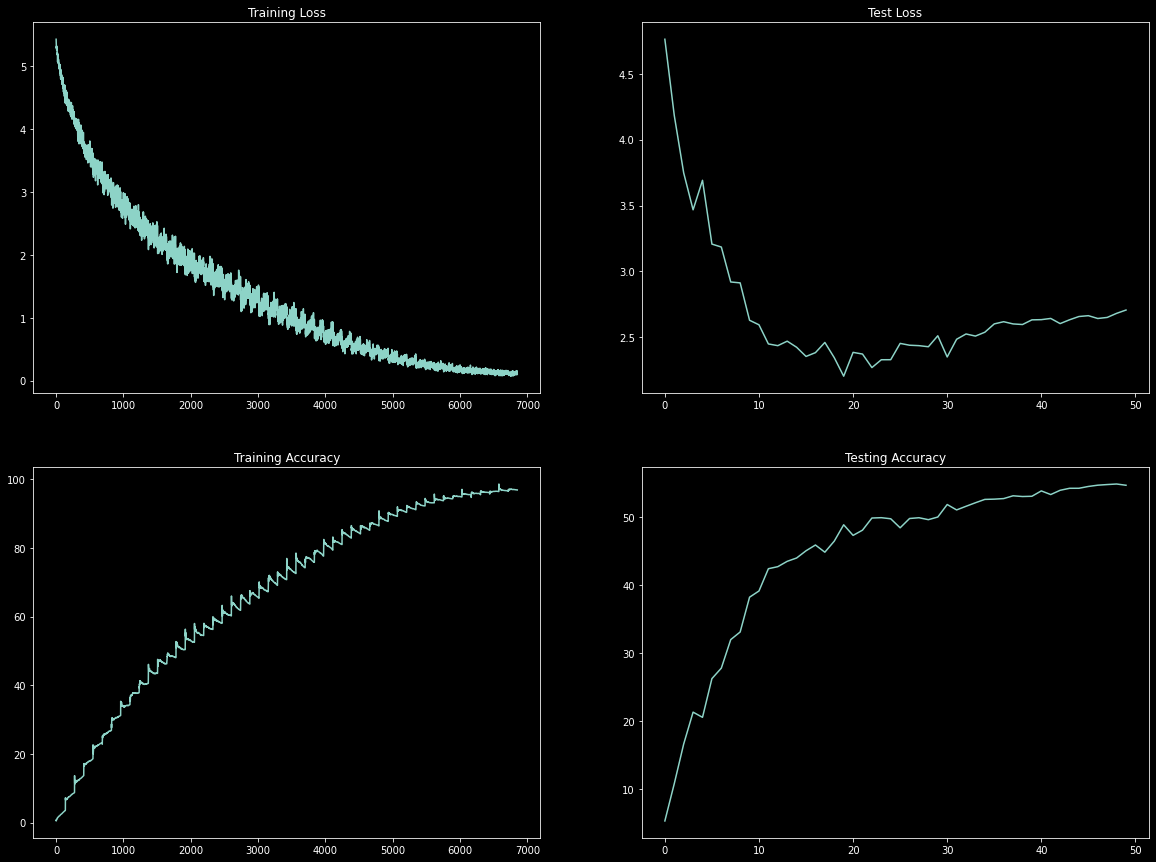

In [ ]:
from util.graph_plot import plot_me
plot_me(train_loss, train_accuracy, test_loss, test_accuracy)

/content/simplif-ai/analytics/gradcam/gradcam_util.py:89: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


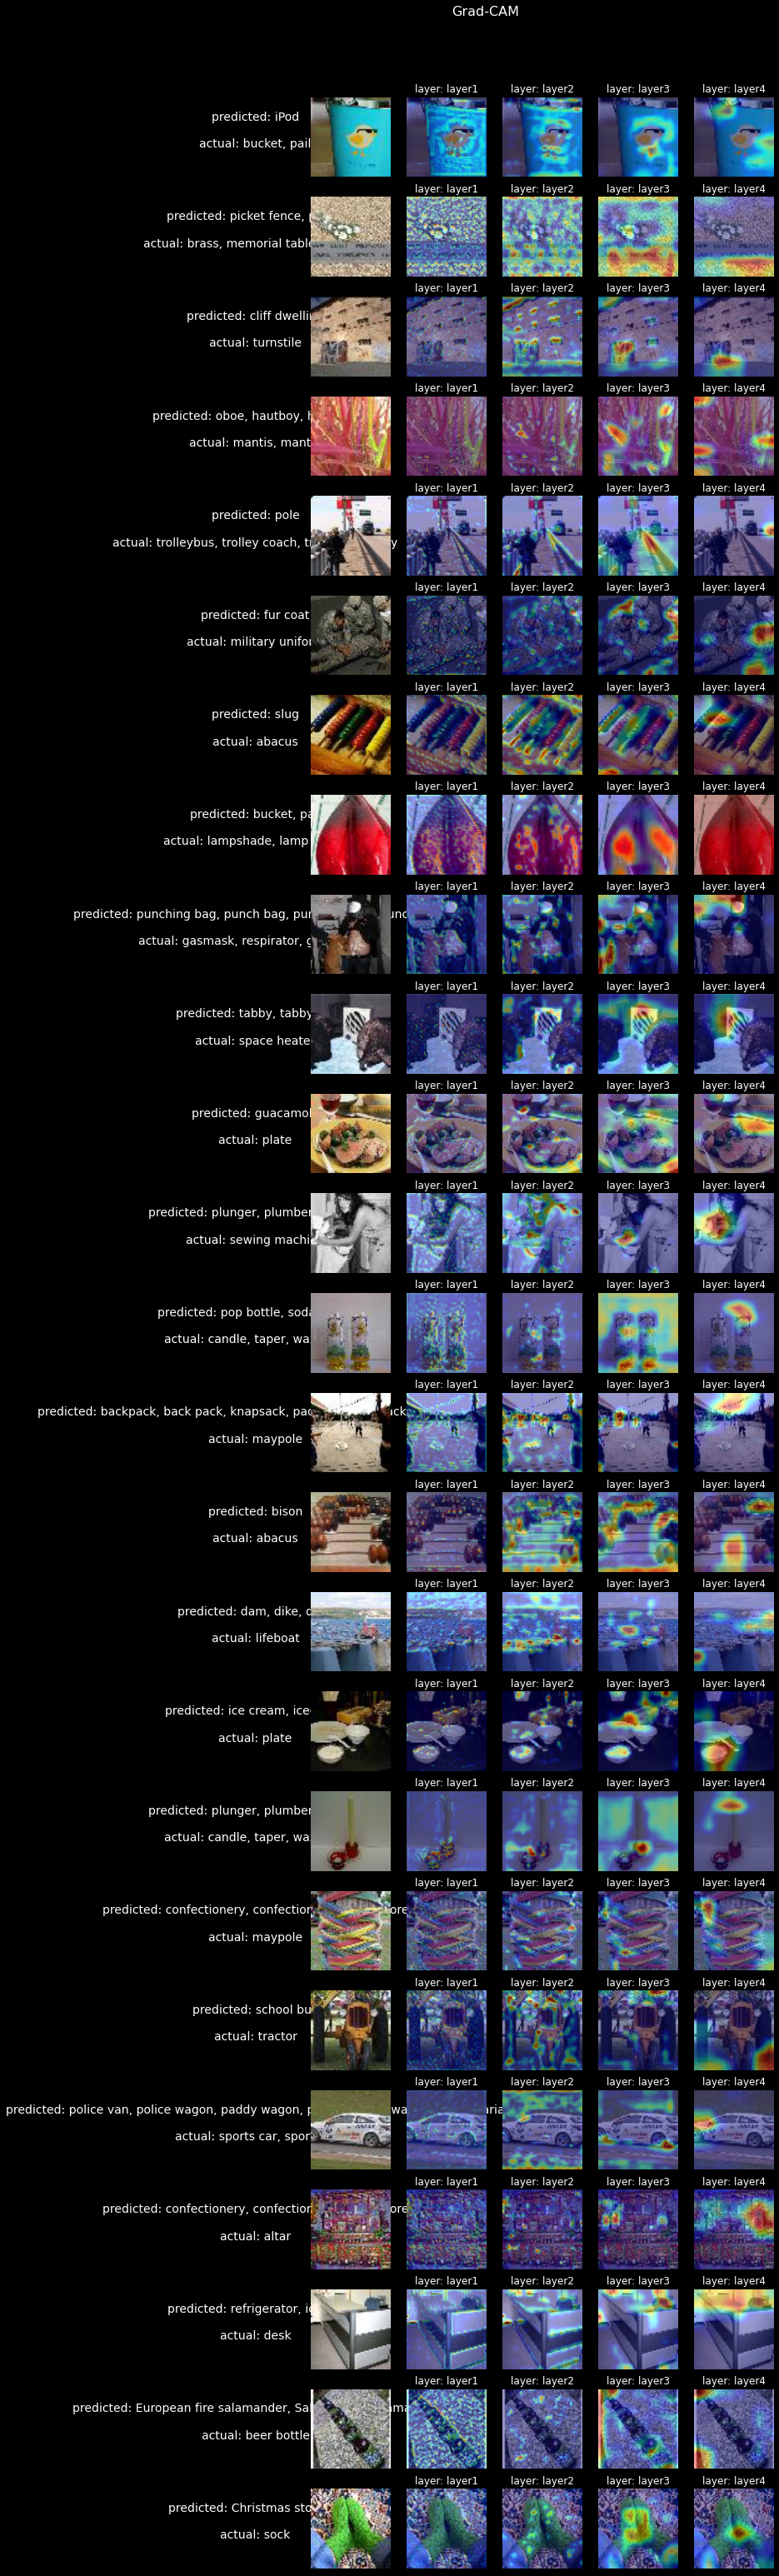

<Figure size 432x288 with 0 Axes>

In [ ]:
from analytics.gradcam.report_gen import get_misclassified_gradcam
target_layers = ["layer1", "layer2", "layer3", "layer4"] # for gradcam

get_misclassified_gradcam(model, misclassified, DEVICE, target_layers, dataloader.datasource.mean, dataloader.datasource.std, classes, total=25)


In [ ]:
torch.save(model.state_dict(), 'resnet_tinyimagenet.h5')